#### Hierarchical Clustering and Dendrograms

If you're dealing with a dataset that has lots of highly correlated variables, a good way to separate them is by using a technique called **hierarchical clustering**, which separates features by how consistently they rank amongst one another in order of importance.  

The technique depends on a measure called **spearman's correlation**, which is distinct from the traditional notion of correlation that we're used to discussing.  

Traditional correlation measures the linear dependence of one variable based upon another.  

Rank correlation measures to what extent values in different columns have a different rank than one another.  It is less demanding than Pearson's (traditional) notion of correlation because it doesn't require their to be a linear relationship.  

### Hierarchical Clustering

Hierarchical clustering takes a bottom up approach to clustering variables together, and does so by iteratively going through every feature and grouping them with its closest neighbor (as measured by distance), until everything's been combined into one master cluster.

The big benefit of hierarchical clustering is that you can create a **dendrogram**, which visualizes the way your features are related to one another.

The following is some sample code to perform this on the Iowa Housing Dataset.

In [13]:
# load in libraries
import pandas as pd
import numpy as np

# load in data
train = pd.read_csv('data/train.csv')

# fill in missing data
def fill_empties(df):
    numeric_columns     = df.select_dtypes(include=np.number).columns.tolist()
    categorical_columns = df.select_dtypes(include=np.object).columns.tolist() 
    
    for column in numeric_columns:
        df[column] = df[column].fillna(df[column].mean())
        
    for column in categorical_columns:
        col_mode = df[column].mode()[0]
        df[column] = df[column].fillna(col_mode)
        
fill_empties(train)

Next, we'll go ahead and fit a quick model, and see what our most important features are.

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
X = train.loc[:, train.columns != 'SalePrice']
y = train['SalePrice']
X = pd.get_dummies(X)

In [17]:
rf = RandomForestRegressor(n_estimators=100)

In [20]:
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
# find the most important features

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.round(rf.feature_importances_, 3)
}).sort_values(by='Importance', ascending=False)

In [43]:
importances

,Feature,Importance
4,OverallQual,0.587
16,GrLivArea,0.102
12,TotalBsmtSF,0.041
14,2ndFlrSF,0.041
9,BsmtFinSF1,0.026
13,1stFlrSF,0.023
26,GarageCars,0.014
3,LotArea,0.013
27,GarageArea,0.013
6,YearBuilt,0.009


In [39]:
# keep the top 50
vals_to_keep = importances['Feature'][:50].values.tolist()

In [33]:
# standardize data
data_for_cluster = (X[vals_to_keep] - X[vals_to_keep].mean()) / X[vals_to_keep].std()

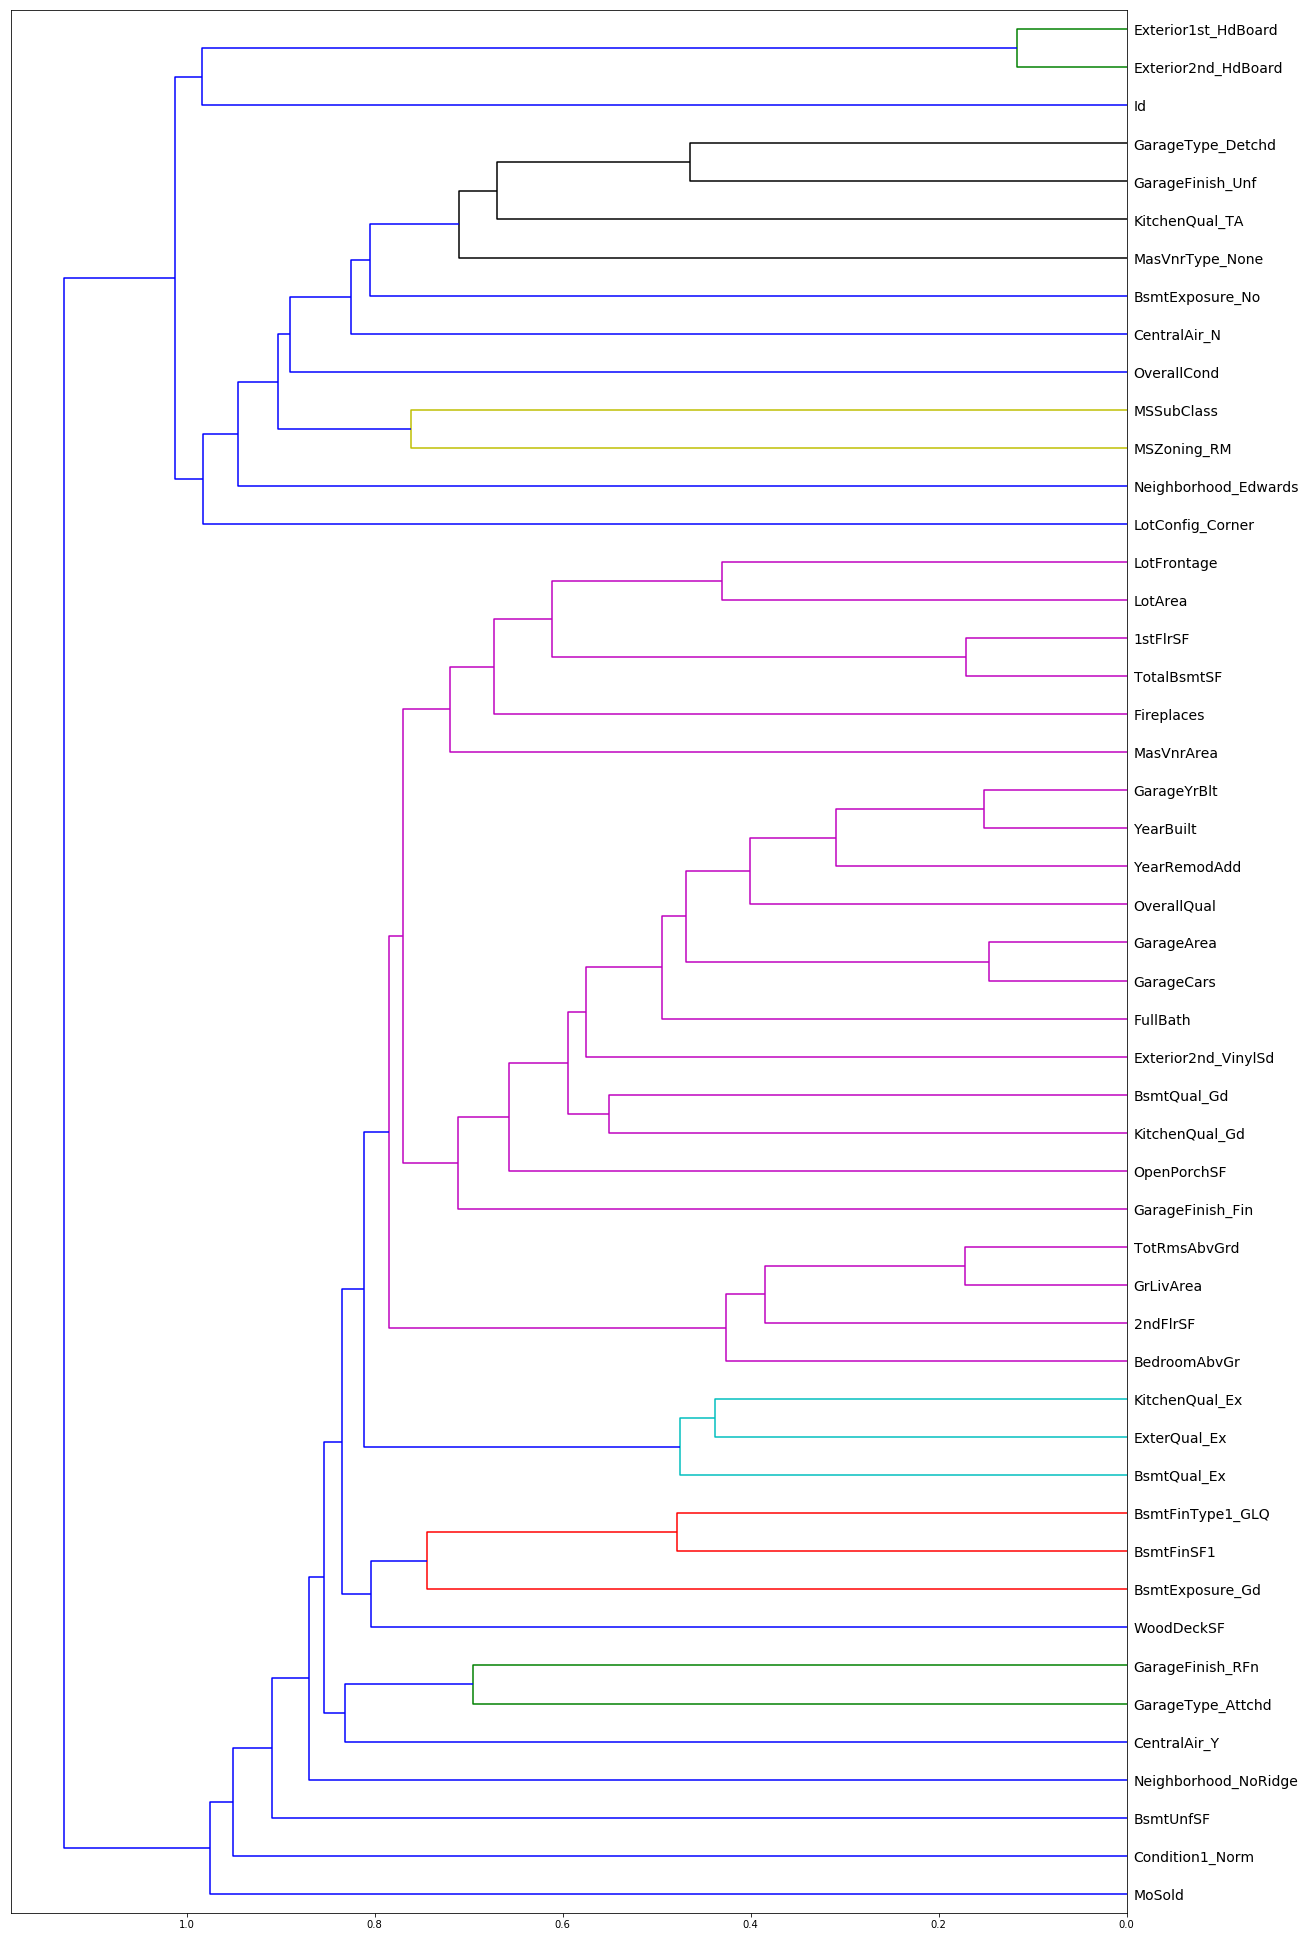

In [42]:
# create the dendrogram
from scipy.cluster import hierarchy as hc
from scipy.stats import spearmanr as sp
import matplotlib.pyplot as plt
%matplotlib inline

corr = np.round(sp(data_for_cluster).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(20,35))
dendrogram = hc.dendrogram(z, labels=vals_to_keep, orientation='left', leaf_font_size=14)
plt.show()